In [4]:
from __future__ import division
import numpy as np
from matplotlib import pyplot as plt
import matplotlib.colors as colors
import pickle
import sys, os
sys.path.append('/home/sbaur/globalPythonHelper/')

import myStyle
myStyle.SetFigureStyle()
latex = myStyle.latex

myStyle.increaseAxisText(6)
myStyle.increaseLegendText(0)

basepath = '/data/user/sbaur/projects/PrepareForGit/Upgrade_DarkMatter/'

In [29]:
def merge_bins(hist, binsmerge_x, binsmerge_y):
    '''
    This function merges the bins in a histogram
    '''
    
    assert np.shape(hist['pdf'])[0]%binsmerge_x ==0 , 'merging not possible'
    assert np.shape(hist['pdf'])[1]%binsmerge_y ==0 , 'merging not possible'
    
    new_x = [hist['bins_x'][i] for i in range(len(hist['bins_x'])) if i%binsmerge_x ==0]
    new_y = [hist['bins_y'][i] for i in range(len(hist['bins_y'])) if i%binsmerge_y ==0]
    
    len_new_x = int(np.shape(hist['pdf'])[0] / binsmerge_x)
    len_new_y = int(np.shape(hist['pdf'])[1] / binsmerge_y)
    
    new_hist = np.zeros((len_new_x,len_new_y))
    
    for j in range(binsmerge_x):
        for k in range(len_new_x):
            for j2 in range(binsmerge_y):
                for k2 in range(len_new_y):
                    new_hist[k,k2] += hist['pdf'][j+k*binsmerge_x , j2+k2*binsmerge_y]
                    
    return new_hist, new_x, new_y



def drawBackgroundPDF(binning, rebin):
    
    hist = pickle.load(open(basepath+'PDFs/background/Background_PDF_Honda2015_oversampling100_'+binning+'.pkl','r'))
    hist = merge_bins(hist, rebin[0], rebin[1])
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))
    plt.rcParams.update({'figure.titlesize': 32})

    pcm = ax1.pcolormesh(hist[1][:-1],hist[2][:-1],hist[0].T/np.sum(hist[0]),norm=colors.LogNorm(),cmap='Oranges')
    fig.colorbar(pcm, ax=ax1, label='probability')

    ax2.step(hist[1][:-1],np.sum(hist[0]/np.sum(hist[0]),axis=1),where='mid',color = 'k')
    ax2.set_ylabel(r"probability")

    ax3.step(hist[2][:-1],np.sum(hist[0]/np.sum(hist[0]),axis=0),where='mid', color = 'k')
    ax3.set_ylabel(r"probability")
    
    
    title = 'Atmospheric neutrino background '

        
    if binning == 'Psi-E':
        
        title += r'   $\Delta\Psi$='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$, '
        title += r'$\Delta$log(E)='+str(1/(float((len(hist[2])-1)/4)))
        
        ax1.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
        ax1.set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
        ax1.set_yscale('log')
                
        ax2.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
        ax2.set_yscale('log')
        ax2.set_ylim(1e-4,1e0)
        ax2.set_xlim(0,np.pi)
        
        ax3.set_xlabel(r"E$_{\mathrm{reco}}$ (GeV)")
        ax3.set_yscale('log')
        ax3.set_xscale('log')
        ax3.set_ylim(1e-4,1e-0)
        ax3.set_xlim(1e-1,1e3)

    if binning == 'RA-DEC':
    
        title += r'  $\Delta$RA='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$, '
        title += r'$\Delta\delta$='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$'
        
        ax1.set_xlabel(r"RA (rad)")
        ax1.set_ylabel(r"$\delta$ (rad)")
                
        ax2.set_xlabel(r"RA (rad)")
        ax2.set_yscale('log')
        ax2.set_ylim(1e-4,1e-0)
        ax2.set_xlim(0,2.*np.pi)
        
        ax3.set_xlabel(r"$\delta$ (rad)")
        ax3.set_yscale('log')
        ax3.set_ylim(1e-4,1e-0)
        ax3.set_xlim(-np.pi/2.,np.pi/2.)
        
    plt.suptitle(title)
    fig.subplots_adjust(wspace=0.4)
    
    return fig




def drawSignalPDF(channel, profile, mass, binning, rebin):

    
    hist = pickle.load(open(basepath+'PDFs/signal/Signal_PDF_'+profile+'_'+str(mass)+'GeV_'+channel+'_oversampling100_'+binning+'.pkl','r'))
    hist = merge_bins(hist, rebin[0], rebin[1])
    
    fig,(ax1,ax2,ax3) = plt.subplots(1,3,figsize=(30,8))
    plt.rcParams.update({'figure.titlesize': 32})

    pcm = ax1.pcolormesh(hist[1][:-1],hist[2][:-1],hist[0].T/np.sum(hist[0]),norm=colors.LogNorm(),cmap='Oranges')
    fig.colorbar(pcm, ax=ax1, label='probability')

    ax2.step(hist[1][:-1],np.sum(hist[0]/np.sum(hist[0]),axis=1),where='mid',color = 'k')
    ax2.set_ylabel(r"probability")

    ax3.step(hist[2][:-1],np.sum(hist[0]/np.sum(hist[0]),axis=0),where='mid', color = 'k')
    ax3.set_ylabel(r"probability")
    
    
    title = r'Signal m$_\mathrm{\chi}$='+str(mass)+r' GeV, '+profile+r' profile, $\chi\chi\rightarrow$'+latex[channel]
    if channel=='nuMu':
        title += r'$\bar{\nu}_{\mathrm{\mu}}$'
        
    if binning == 'Psi-E':
        
        title += r'   $\Delta\Psi$='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$, '
        title += r'$\Delta$log(E)='+str(1/(float((len(hist[2])-1)/4)))
        
        ax1.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
        ax1.set_ylabel(r"E$_{\mathrm{reco}}$ (GeV)")
        ax1.set_yscale('log')
                
        ax2.set_xlabel(r"$\Psi_{\mathrm{reco}}$ (rad)")
        ax2.set_yscale('log')
        ax2.set_ylim(1e-4,1e0)
        ax2.set_xlim(0,np.pi)
        
        ax3.set_xlabel(r"E$_{\mathrm{reco}}$ (GeV)")
        ax3.set_yscale('log')
        ax3.set_xscale('log')
        ax3.set_ylim(1e-4,1e-0)
        ax3.set_xlim(1e-1,1e3)

    if binning == 'RA-DEC':
    
        title += r'  $\Delta$RA='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$, '
        title += r'$\Delta\delta$='+str(np.diff(hist[1])[0]*180/np.pi)+r'$^\circ$'
        
        ax1.set_xlabel(r"RA (rad)")
        ax1.set_ylabel(r"$\delta$ (rad)")
                
        ax2.set_xlabel(r"RA (rad)")
        ax2.set_yscale('log')
        ax2.set_ylim(1e-4,1e-0)
        ax2.set_xlim(0,2.*np.pi)
        
        ax3.set_xlabel(r"$\delta$ (rad)")
        ax3.set_yscale('log')
        ax3.set_ylim(1e-4,1e-0)
        ax3.set_xlim(-np.pi/2.,np.pi/2.)
        
    plt.suptitle(title)
    fig.subplots_adjust(wspace=0.4)
    
    return fig


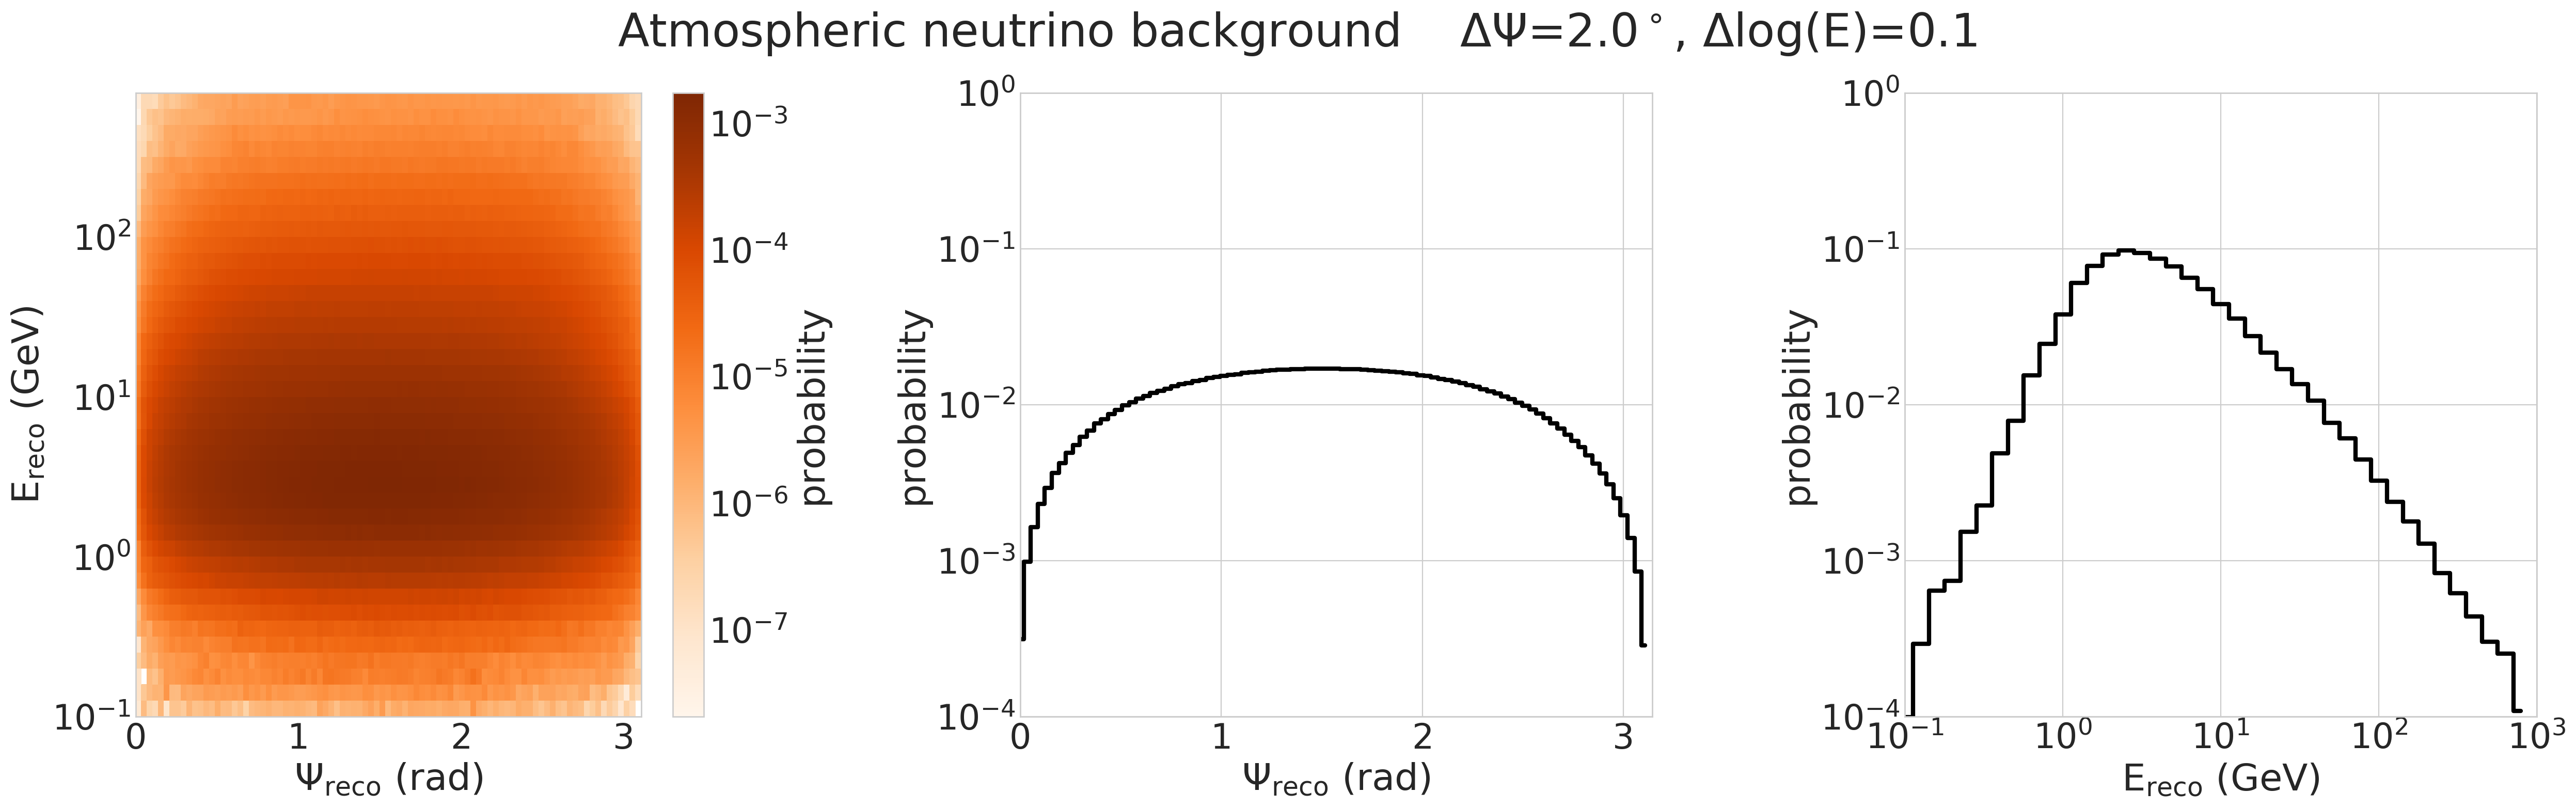

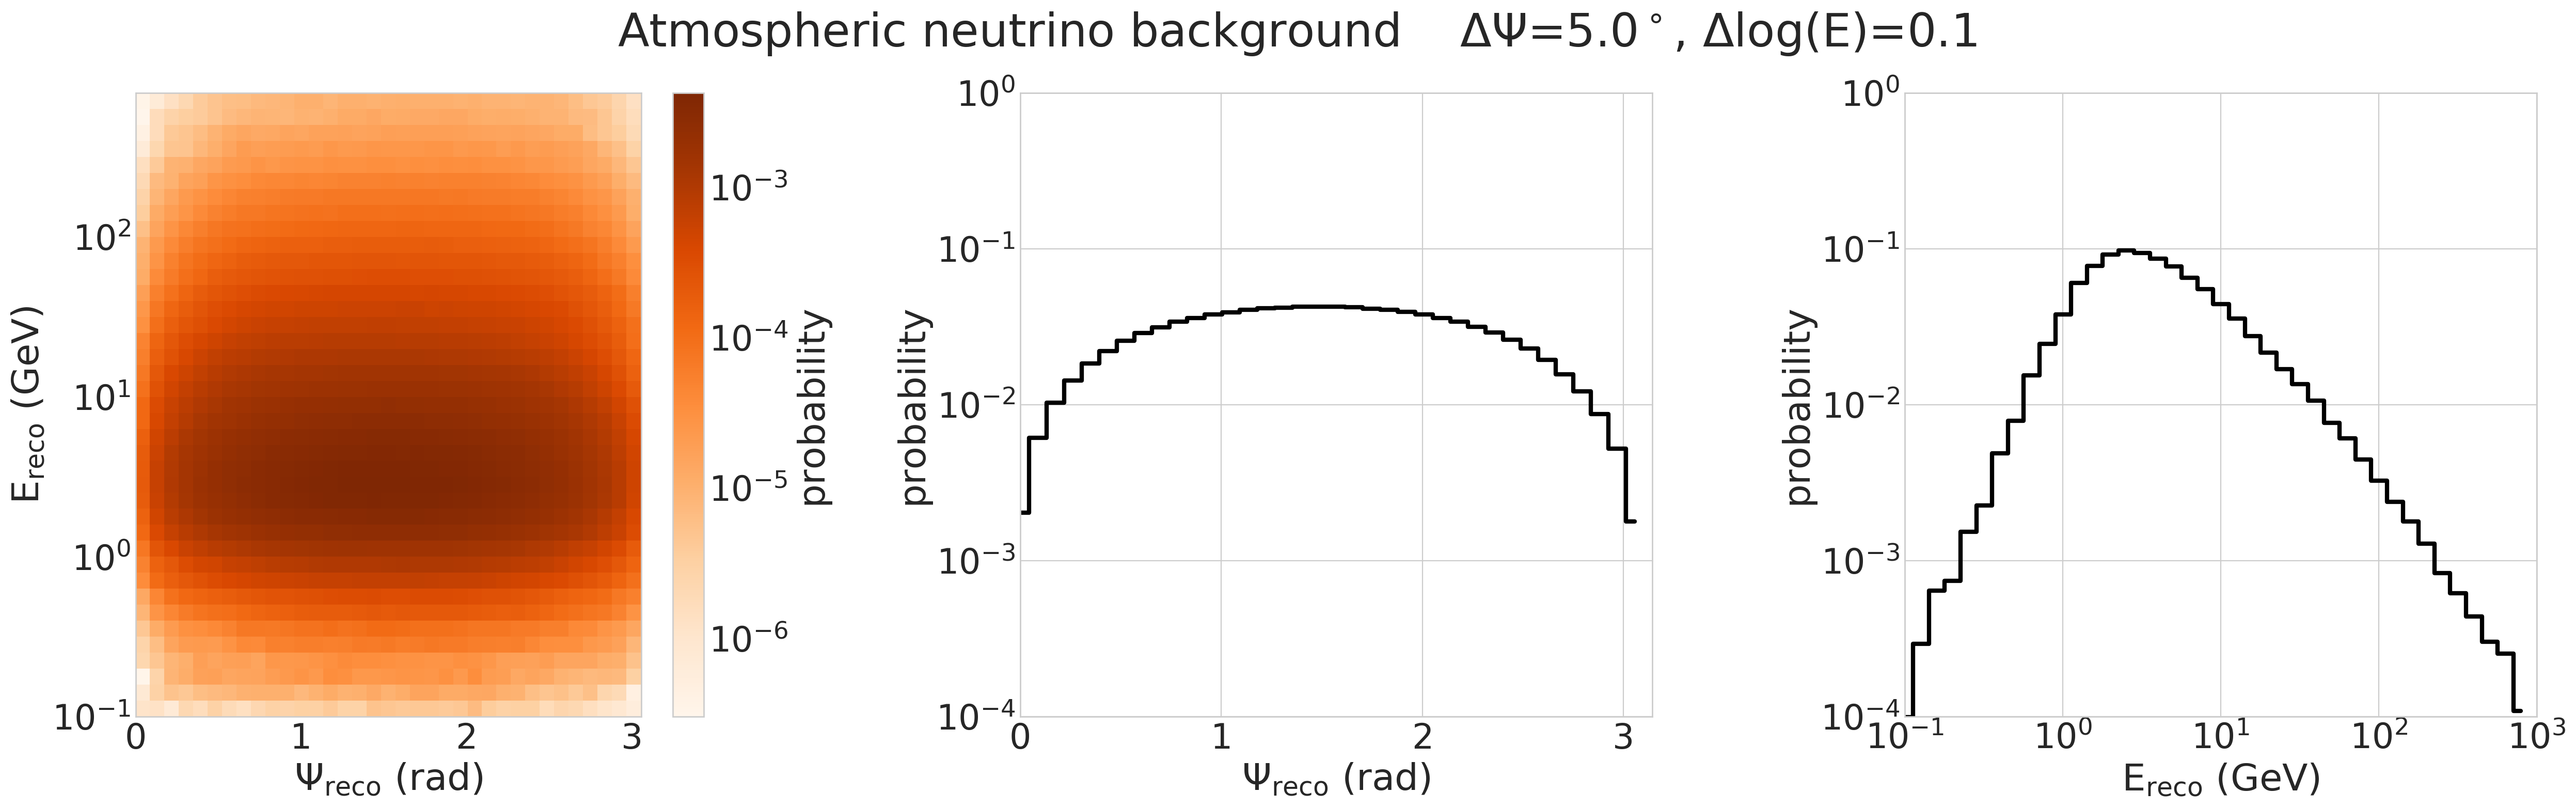

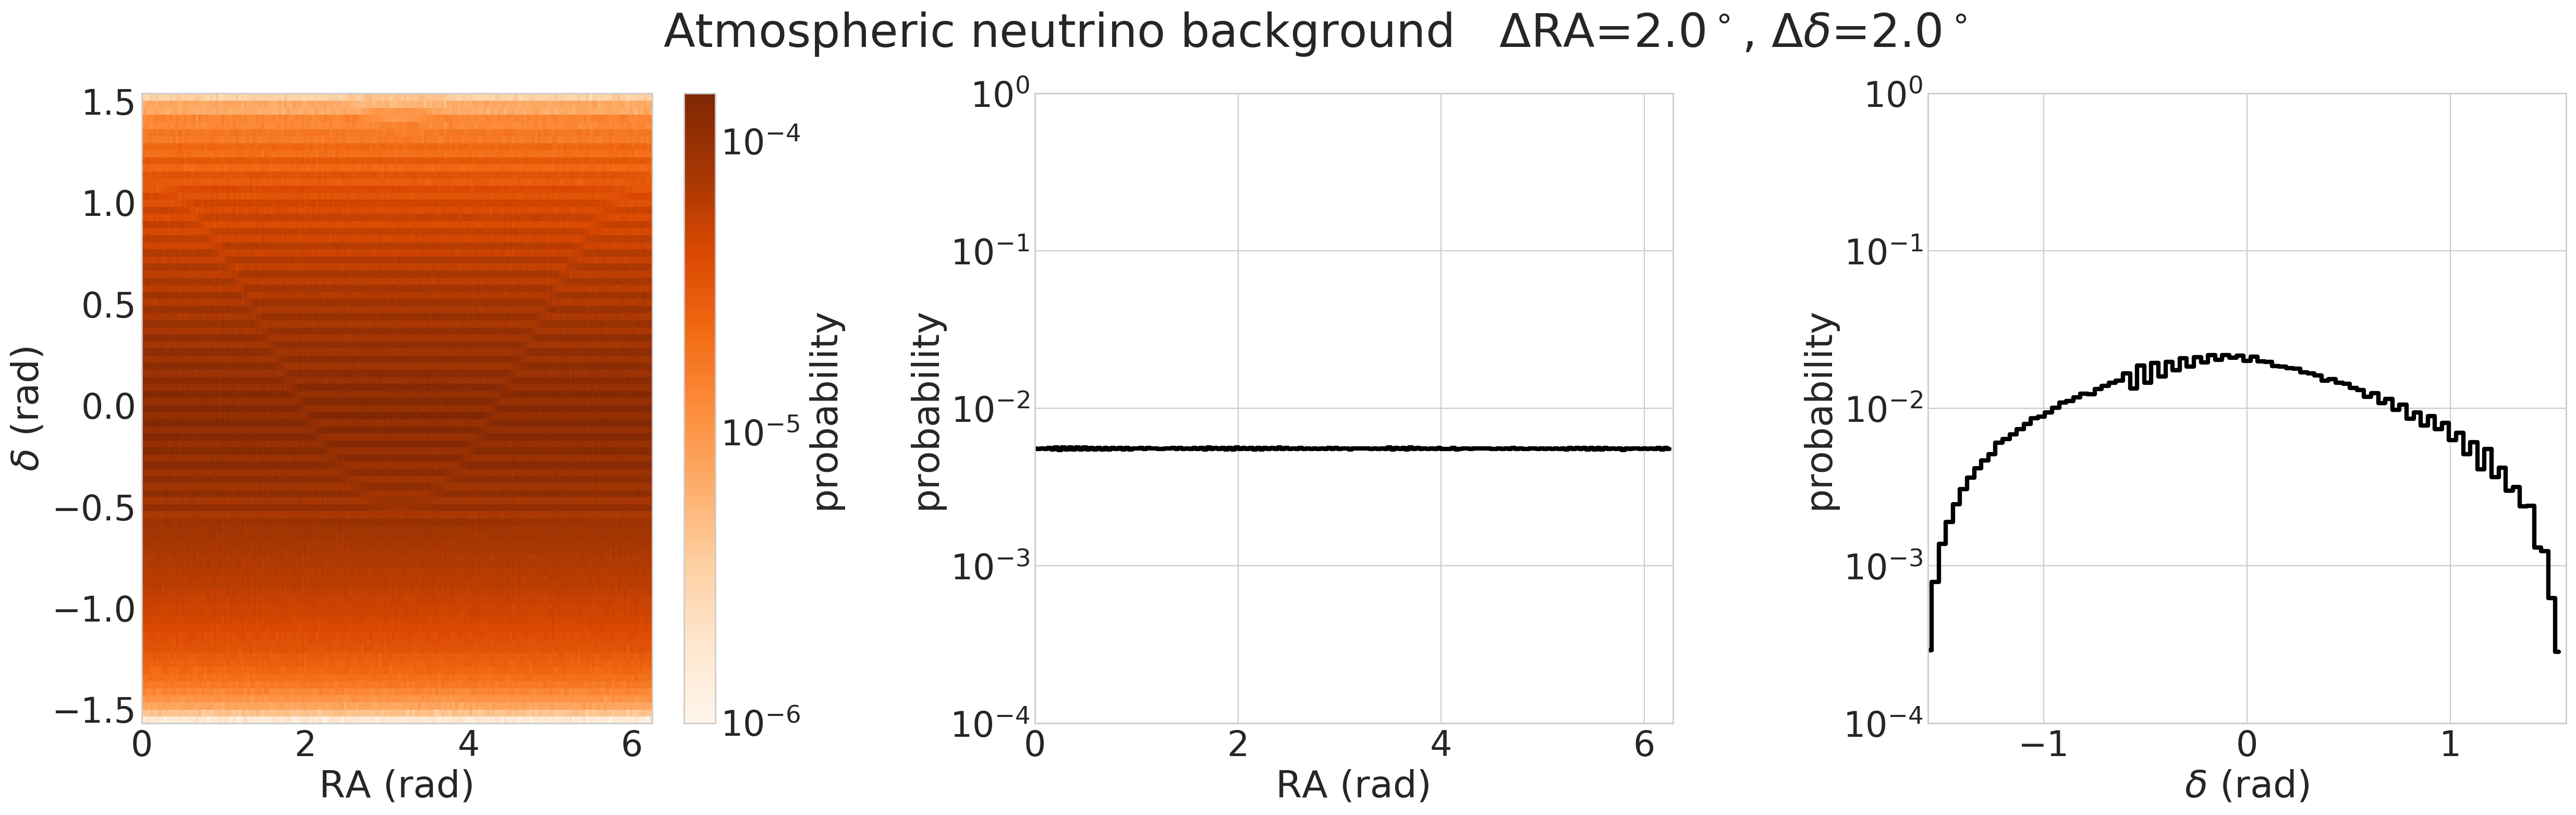

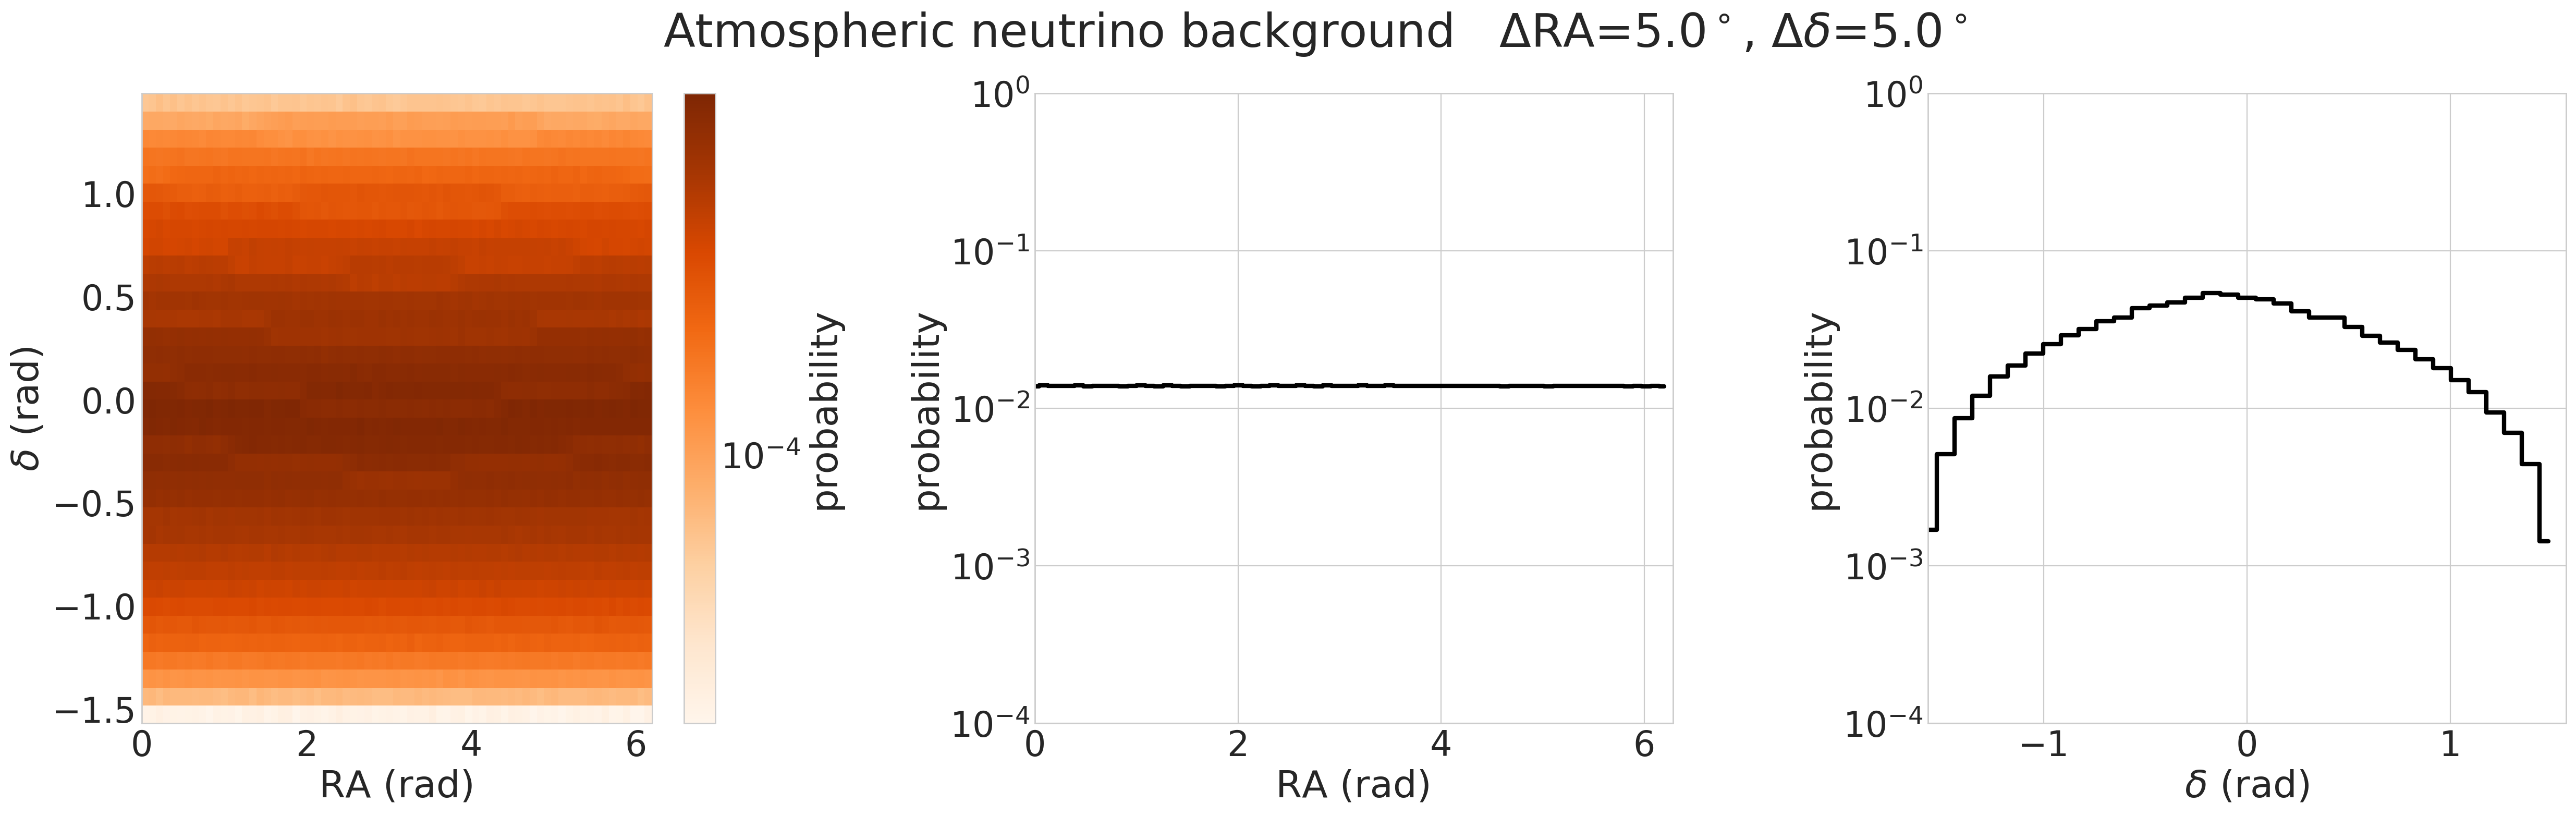

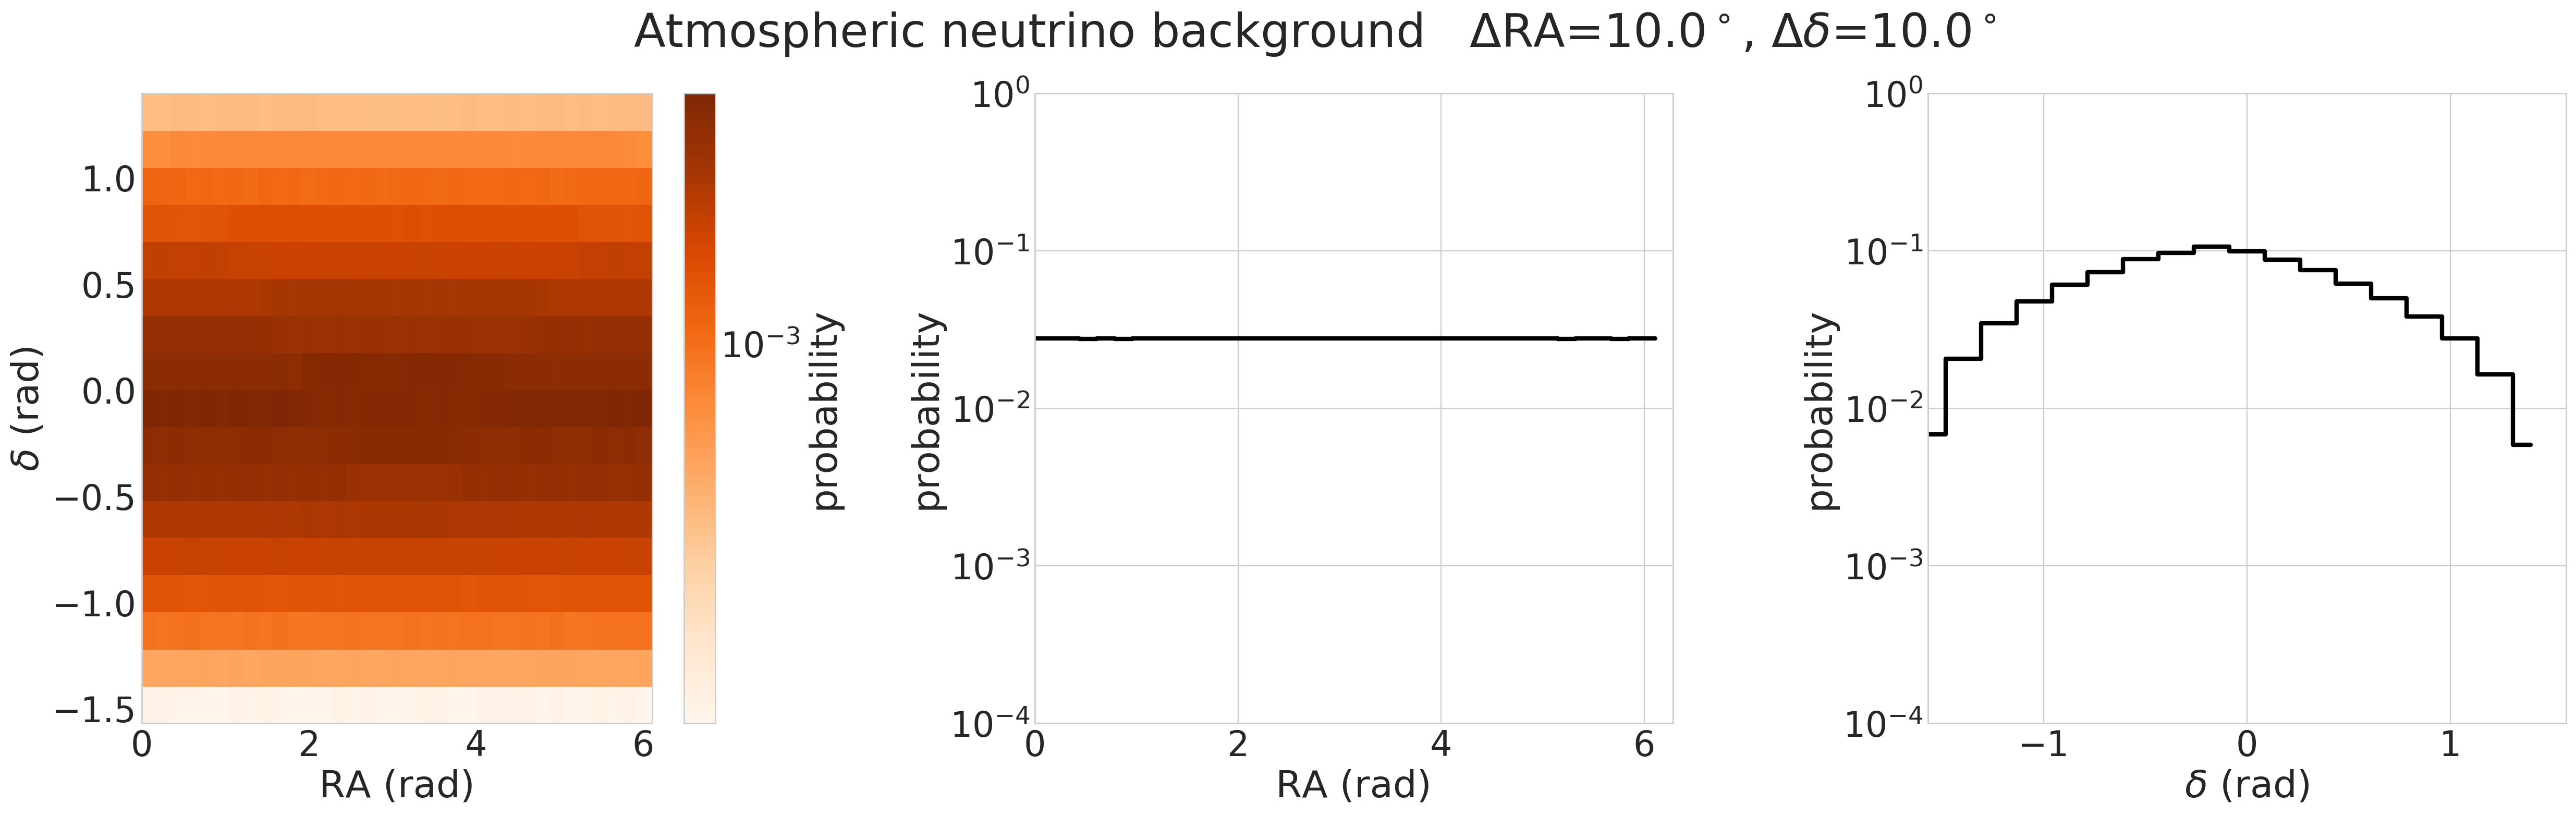

In [26]:
plt.rcParams.update({'figure.dpi': 200.})
myStyle.increaseAxisText(10)

fig1 = drawBackgroundPDF('Psi-E',(2,2))
fig2 = drawBackgroundPDF('Psi-E',(5,2))

fig3 = drawBackgroundPDF('RA-DEC',(2,2))
fig4 = drawBackgroundPDF('RA-DEC',(5,5))
fig5 = drawBackgroundPDF('RA-DEC',(10,10))

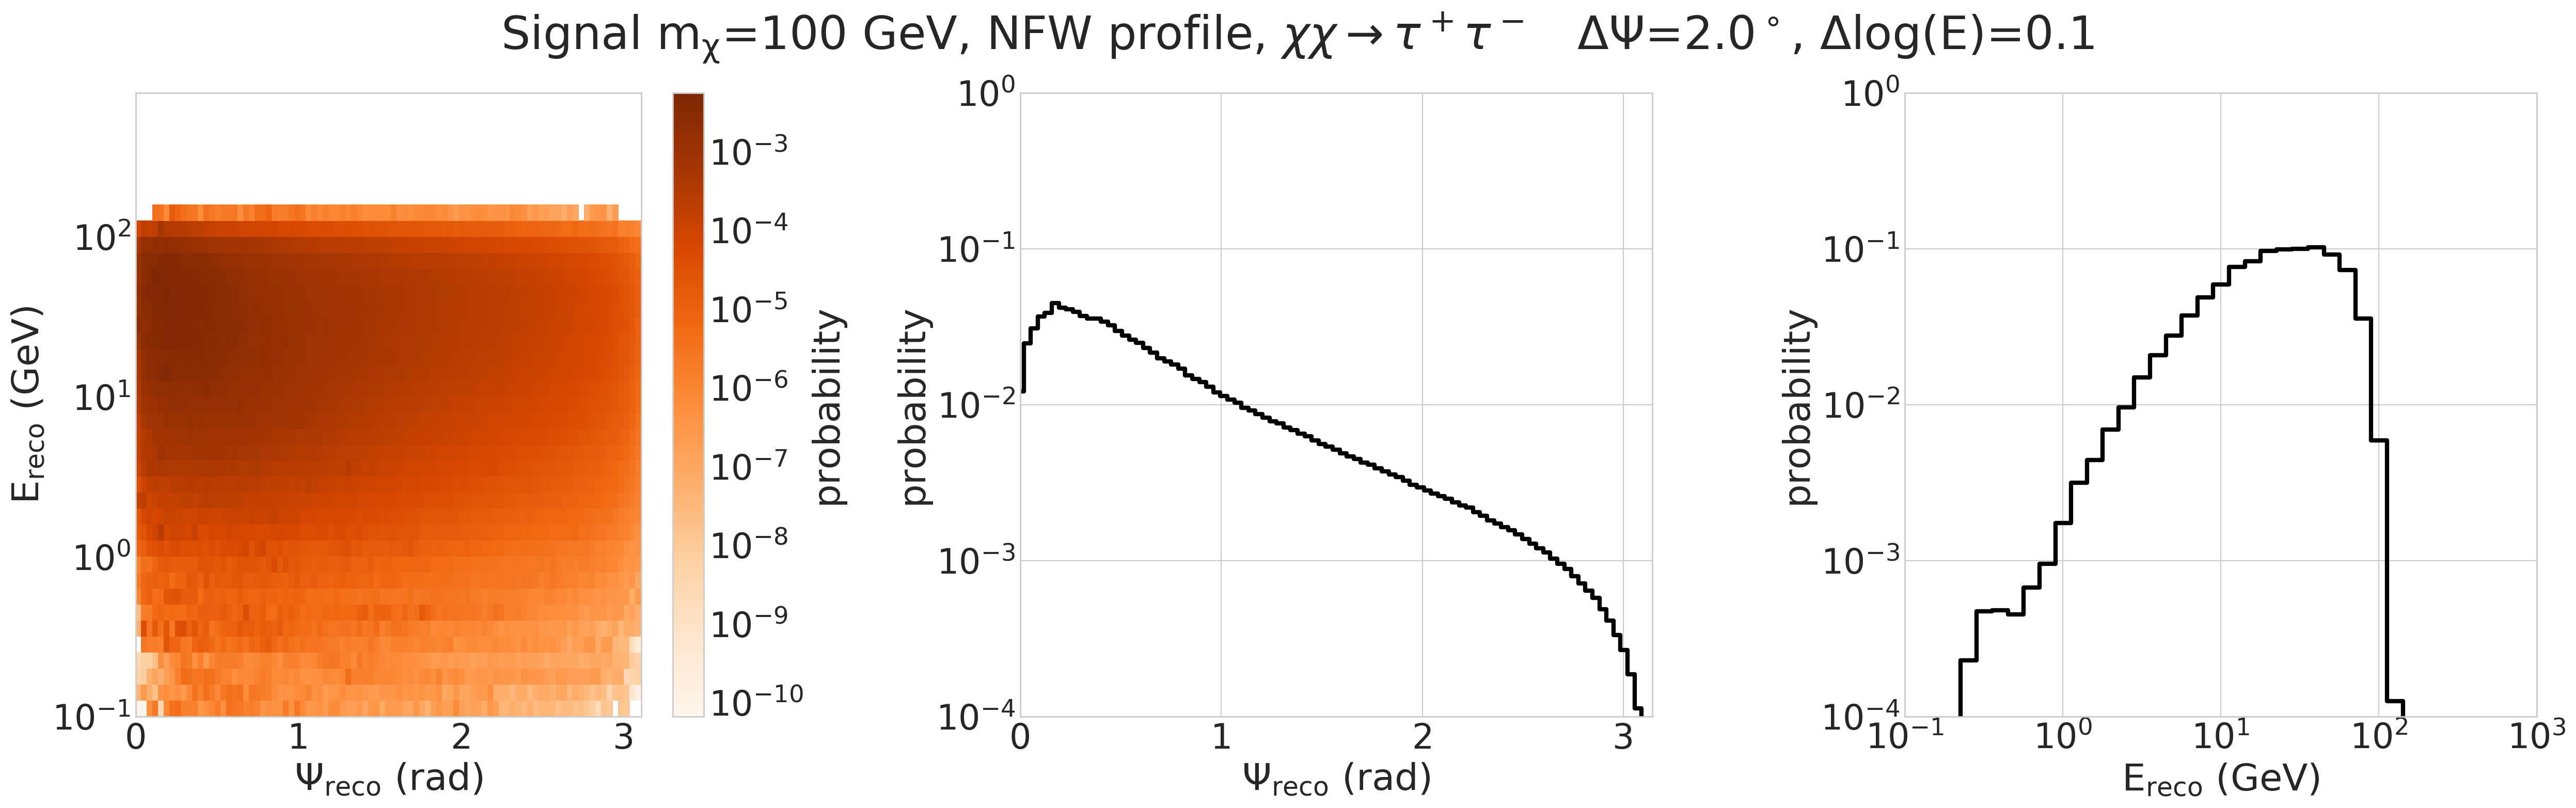

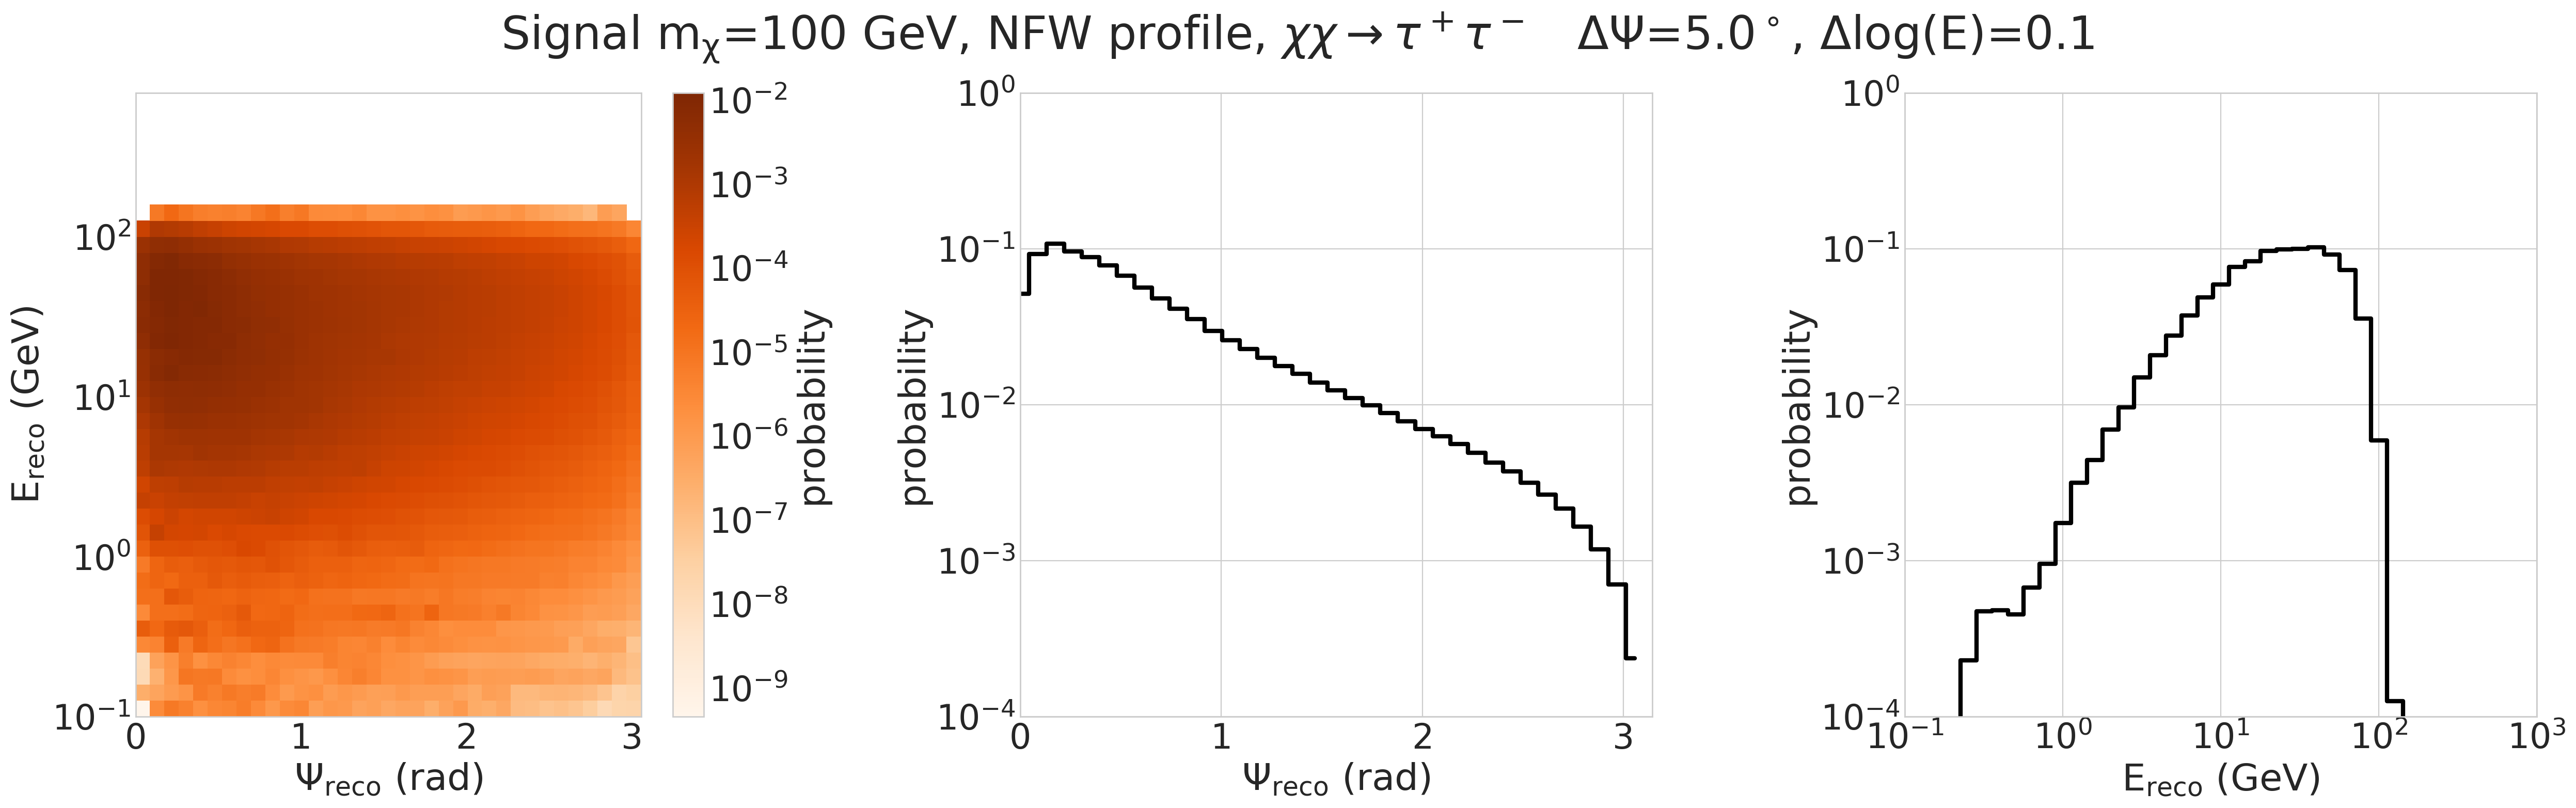

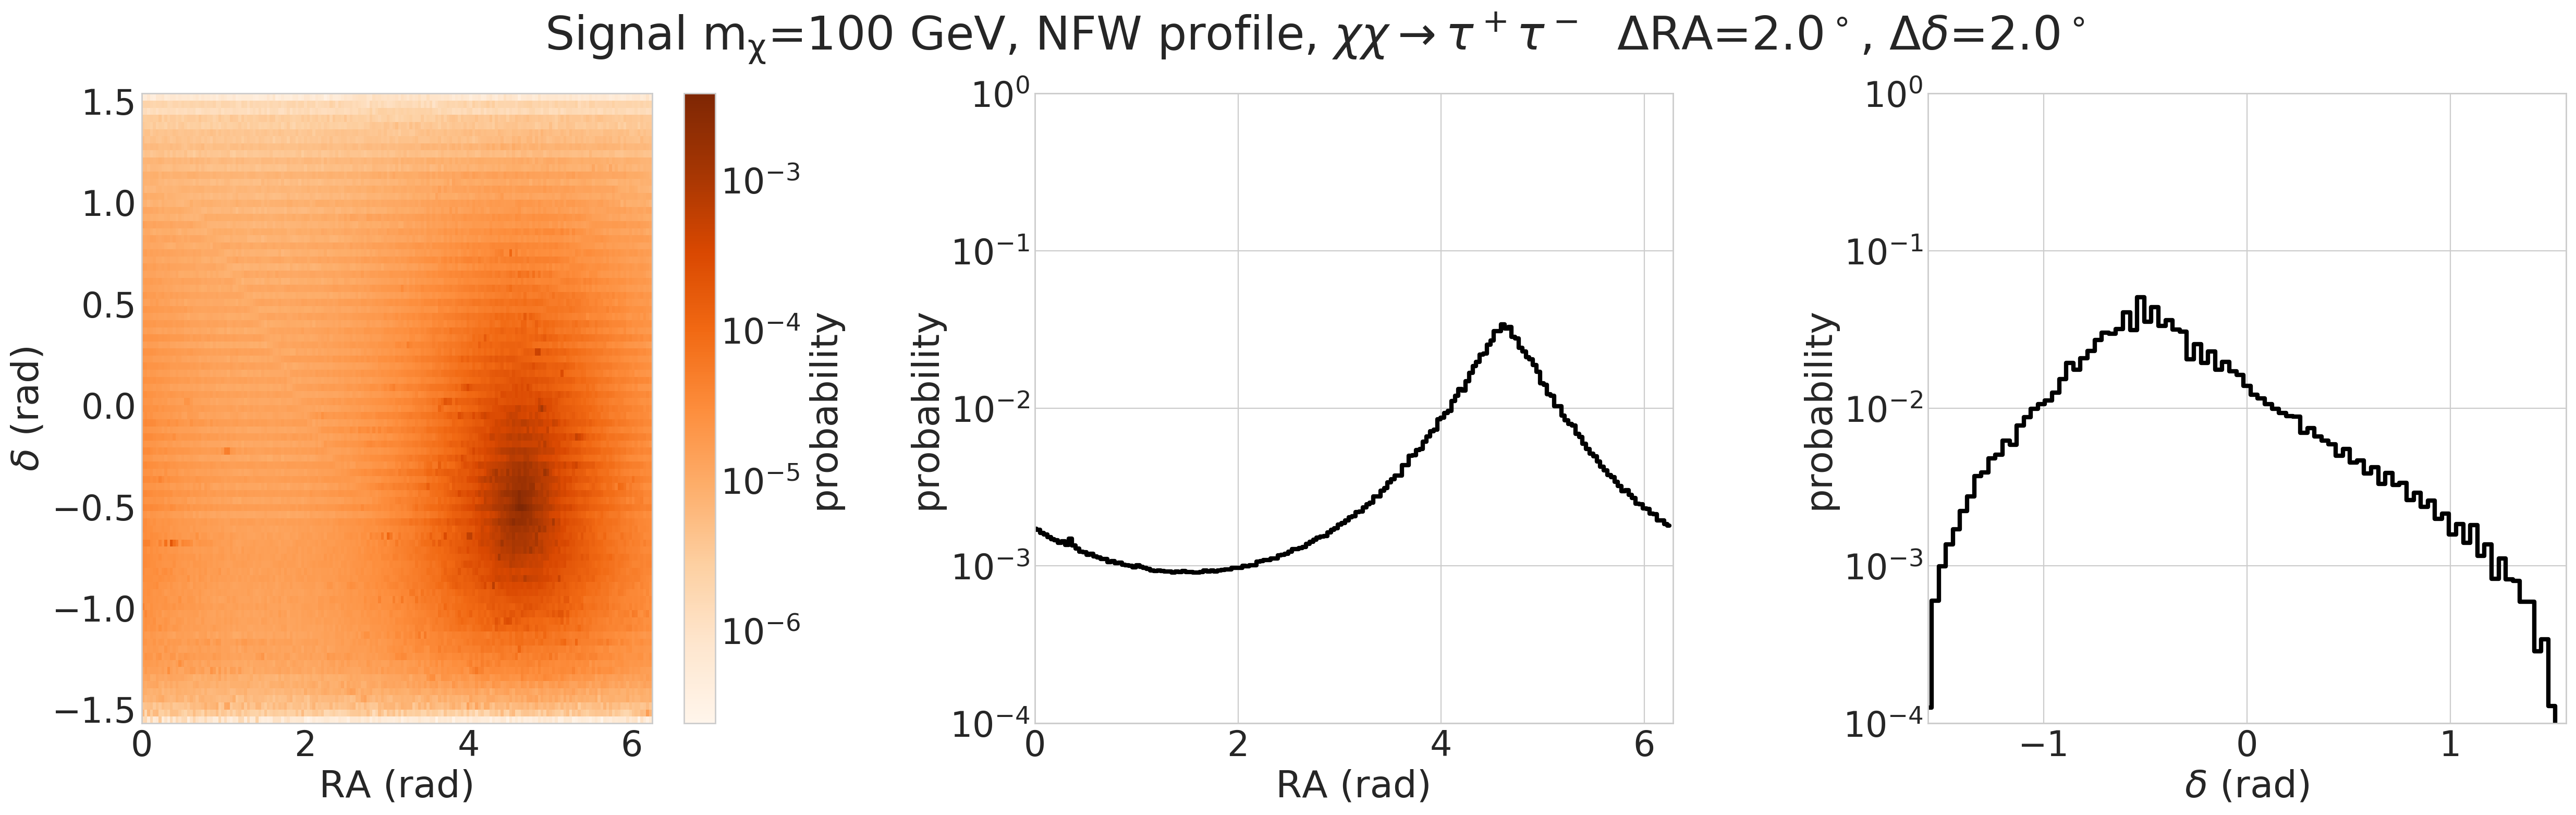

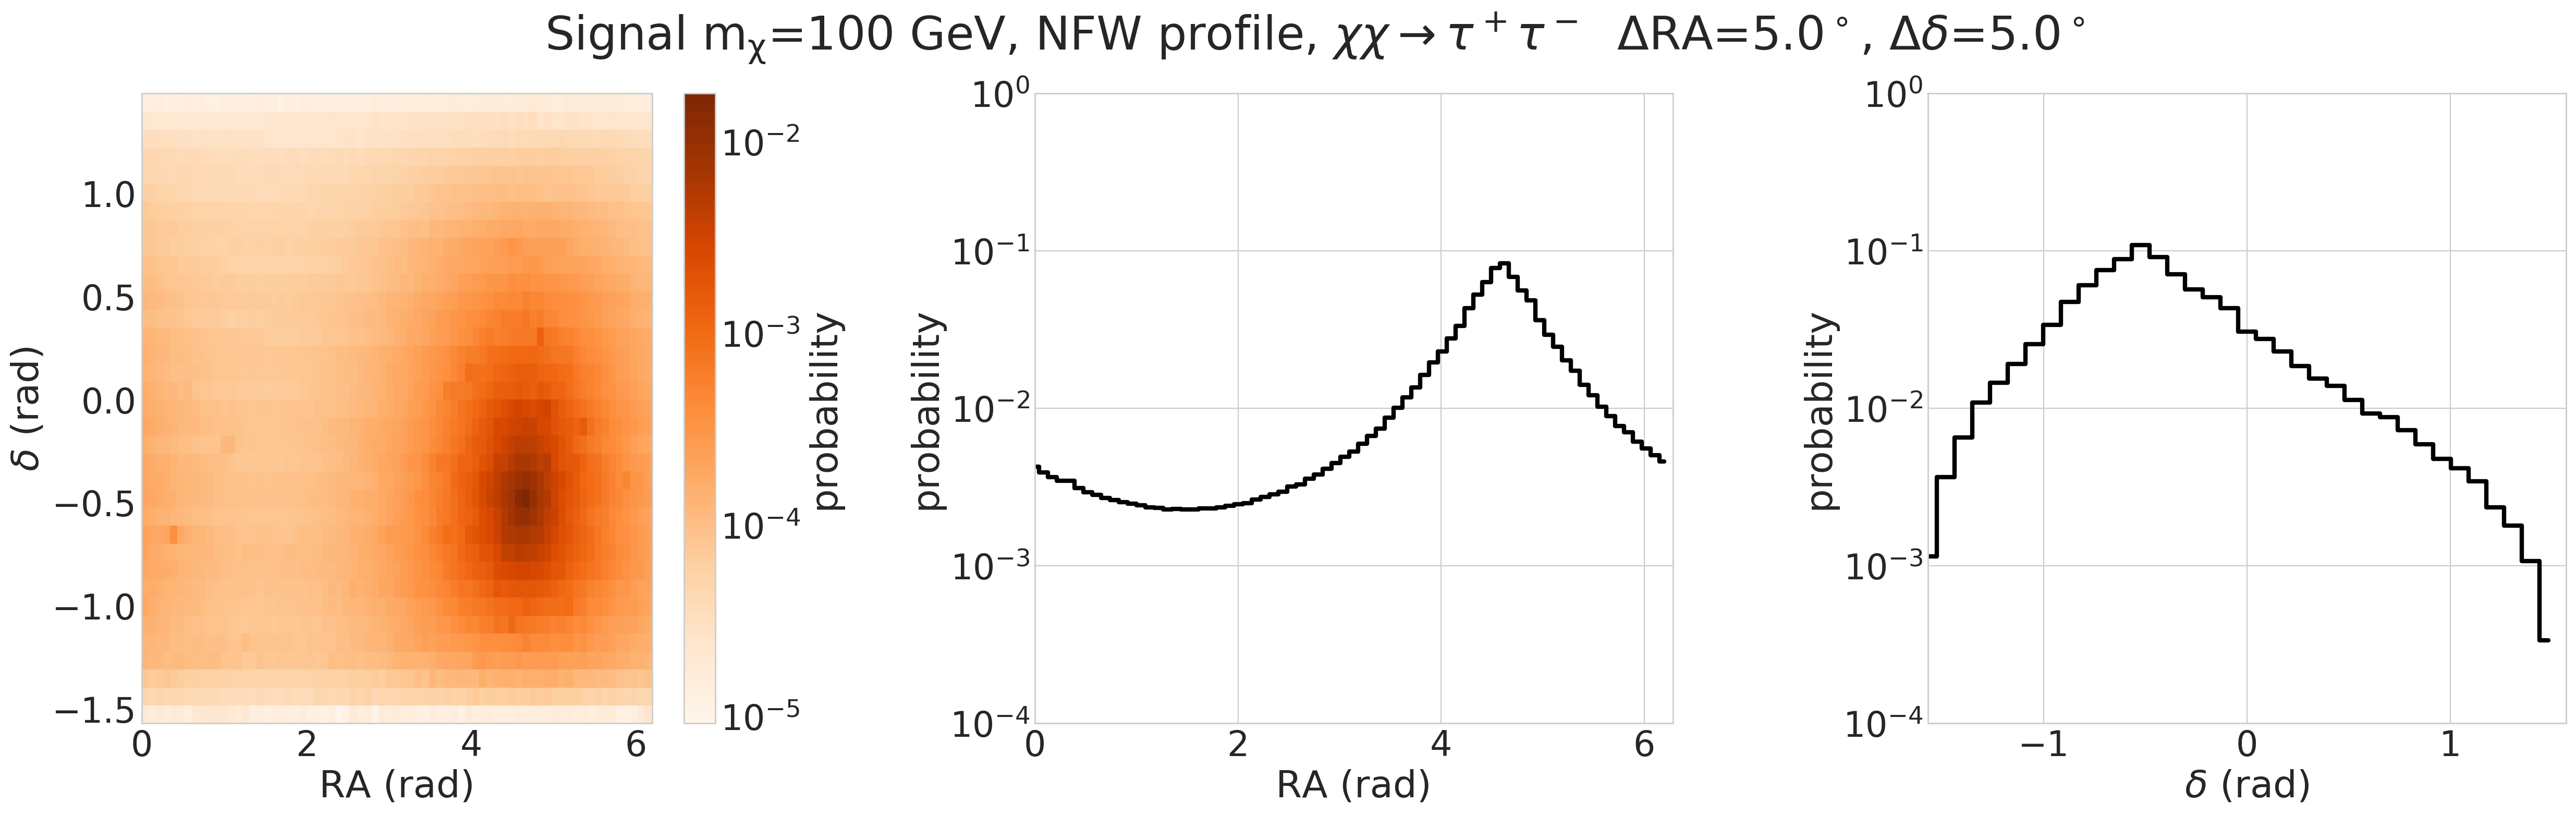

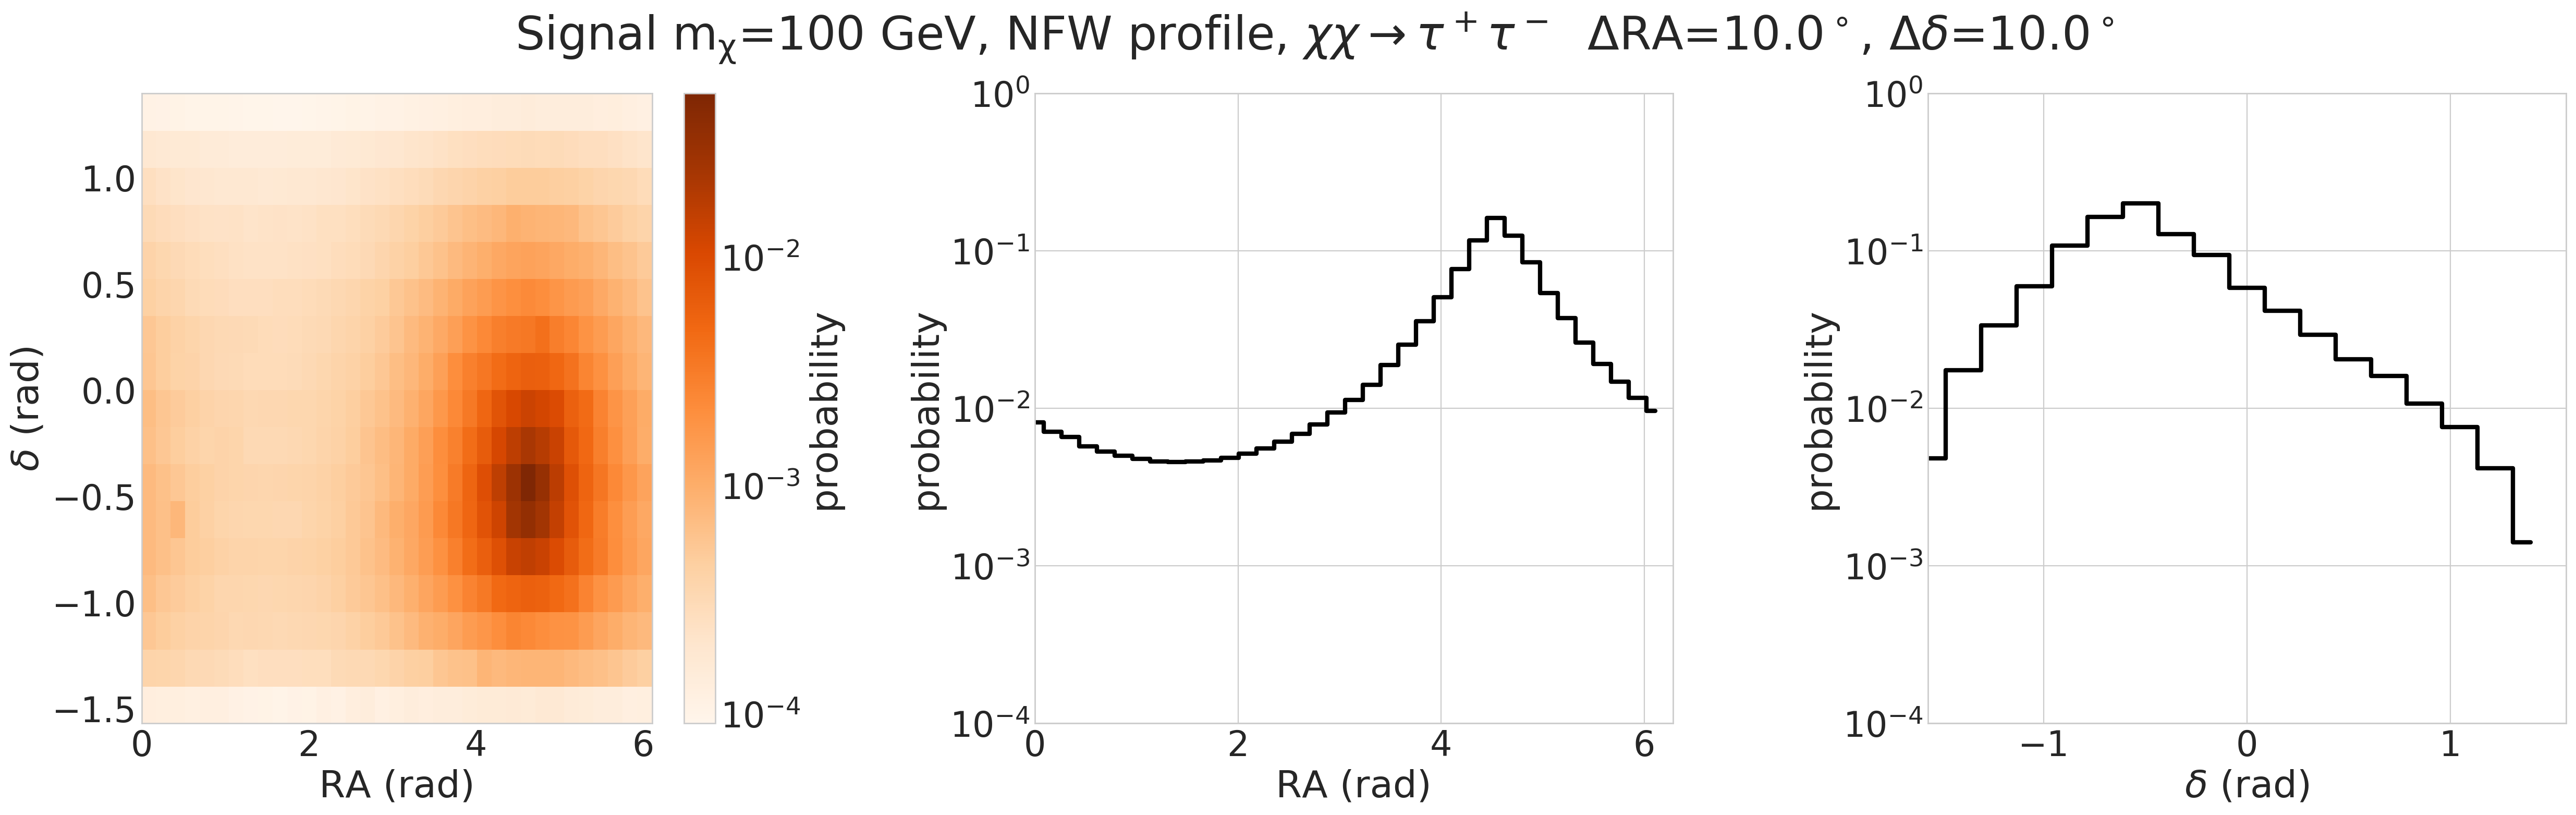

In [27]:
plt.rcParams.update({'figure.dpi': 200.})
myStyle.increaseAxisText(10)

c = 'tau'
m = 100

fig1 = drawSignalPDF(c,'NFW',m,'Psi-E',(2,2))
fig2 = drawSignalPDF(c,'NFW',m,'Psi-E',(5,2))

fig3 = drawSignalPDF(c,'NFW',m,'RA-DEC',(2,2))
fig4 = drawSignalPDF(c,'NFW',m,'RA-DEC',(5,5))
fig5 = drawSignalPDF(c,'NFW',m,'RA-DEC',(10,10))

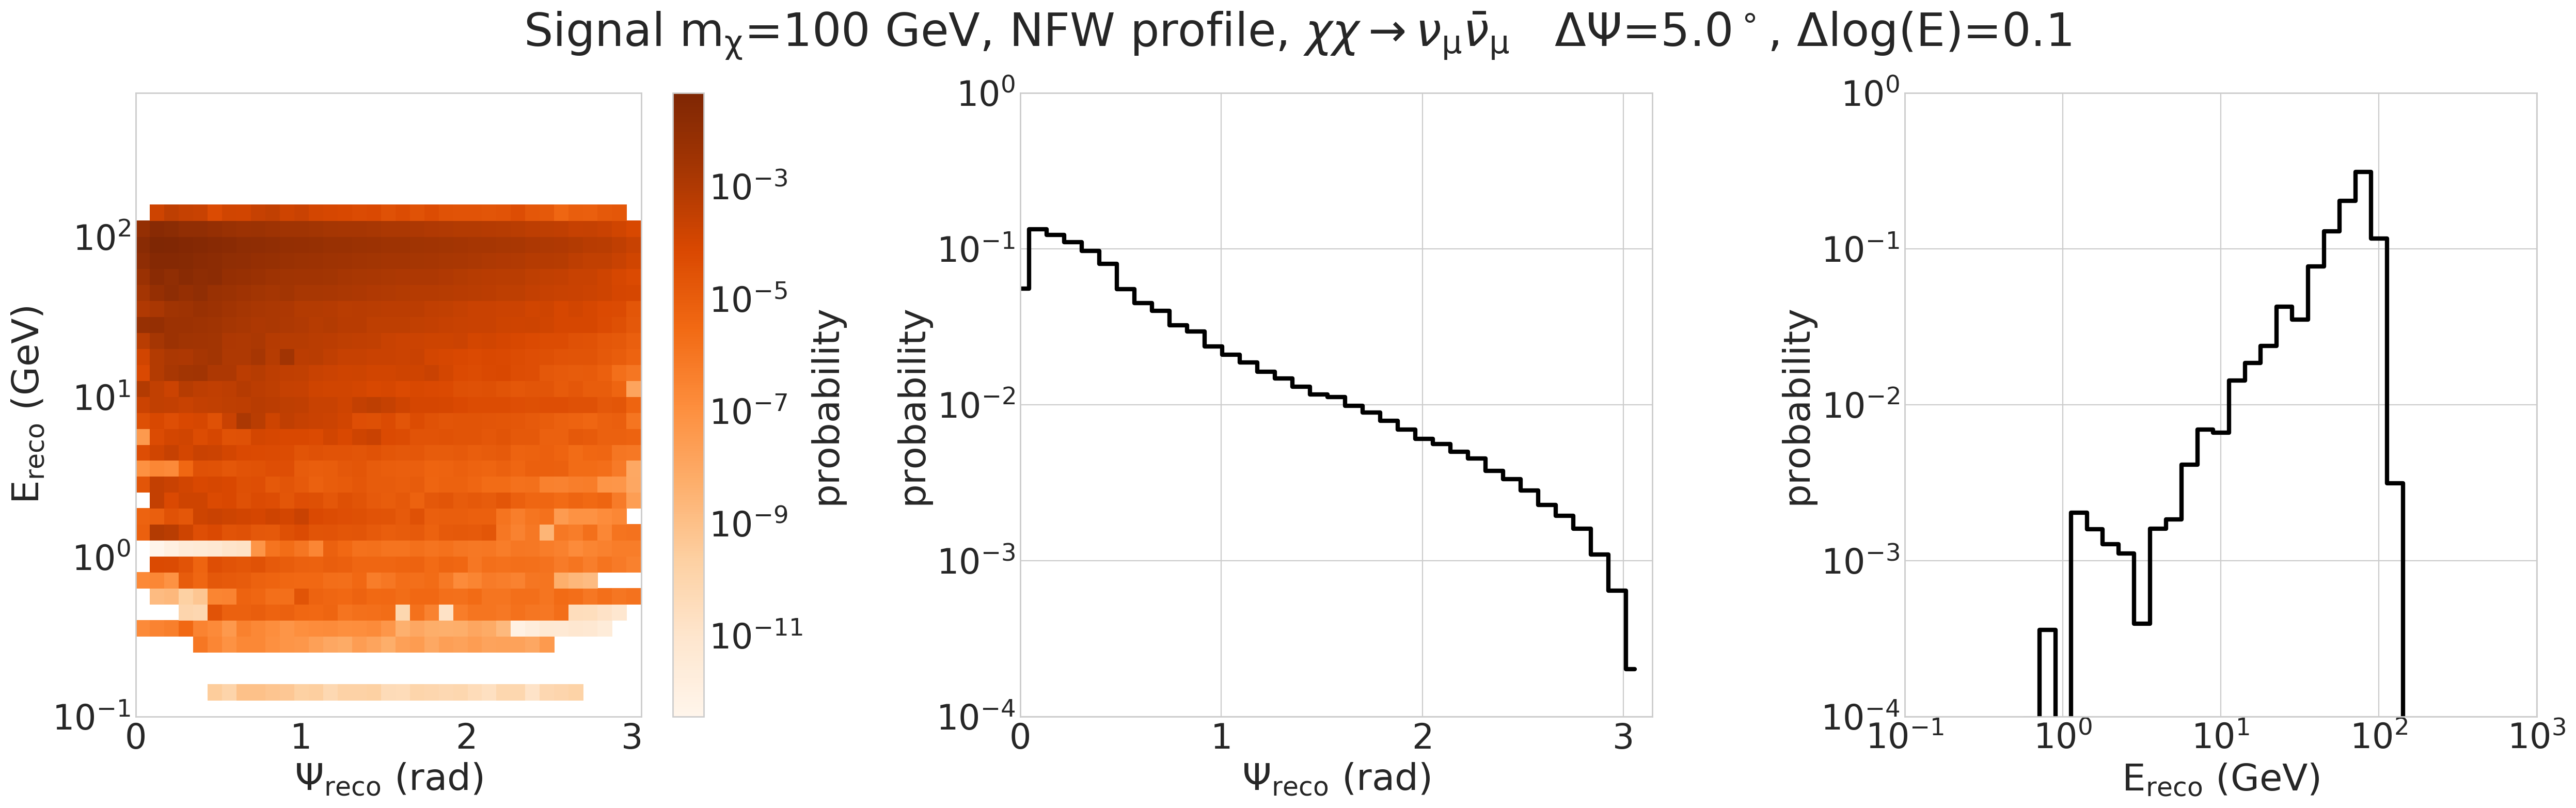

In [30]:
fig1 = drawSignalPDF('nuMu','NFW',100,'Psi-E',(5,2))
